In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
import numpy as np
from tensorflow import keras as keras
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
# import keras

In [0]:
# set seed
np.random.seed(1228)
tf.random.set_seed(1228)

In [0]:
class conv_highway(tf.keras.layers.Layer):
    def __init__(self, units, kernel_size, strides, padding):
        super(conv_highway, self).__init__()
        self.units = units
        self.kernel_size = kernel_size
        self.strides = strides
        self.padding = padding
        
        self.conv_1 = keras.layers.Conv2D(filters=units, kernel_size=kernel_size, strides=strides, padding='same')
        self.conv_2 = keras.layers.Conv2D(filters=units, kernel_size=kernel_size, strides=strides, padding='same', bias_initializer=tf.keras.initializers.Constant(-3.0))
            
    def call(self, inputs):
        H = self.conv_1(inputs)
        H = keras.layers.Activation('relu')(H)
        print(H)
        T = self.conv_2(inputs)
        T = keras.layers.Activation('sigmoid')(T)
        print(T)
        return H*T + (1.0 - T) * inputs



def build_model(mode='conv'):
    if mode == 'conv':
        input_ = keras.layers.Input(shape=(28,28,1))
        x = input_
        for i in range(5):
            x = keras.layers.Conv2D(128, 3, 1, padding='same', activation='relu')(x)
            if i % 2:
              x = keras.layers.MaxPool2D()(x)
        x = keras.layers.GlobalAvgPool2D()(x)
        output_ = keras.layers.Dense(10, activation='softmax')(x)
    
    else:
        input_ = keras.layers.Input(shape=(28,28,1))
        x = input_
        for i in range(5):
            x = conv_highway(128, 3, 1, 'same')(x)
            if i % 2:
              x = keras.layers.MaxPool2D()(x)
        x = keras.layers.GlobalAvgPool2D()(x)
        output_ = keras.layers.Dense(10, activation='softmax')(x)
    
    return keras.models.Model(input_, output_)

In [121]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = (x_train - 127.5) / 127.5
x_train = np.expand_dims(x_train, 3)

x_test = (x_test - 127.5) / 127.5
x_test = np.expand_dims(x_test, 3)

print(y_train[0])
y_train = tf.keras.utils.to_categorical(y_train)
print(y_train[0])

y_test = tf.keras.utils.to_categorical(y_test)

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [122]:
# 1)
conv_model = build_model('conv')
conv_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
conv_hist = conv_model.fit(x_train, y_train, batch_size=512, epochs=20, validation_data=(x_test, y_test))   

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 17s 290us/sample - loss: 0.8941 - accuracy: 0.7018 - val_loss: 0.1995 - val_accuracy: 0.9425
Epoch 2/20
60000/60000 [==============================] - 16s 272us/sample - loss: 0.1722 - accuracy: 0.9485 - val_loss: 0.1350 - val_accuracy: 0.9581
Epoch 3/20
60000/60000 [==============================] - 16s 273us/sample - loss: 0.1276 - accuracy: 0.9615 - val_loss: 0.1103 - val_accuracy: 0.9637
Epoch 4/20
60000/60000 [==============================] - 16s 272us/sample - loss: 0.0958 - accuracy: 0.9709 - val_loss: 0.0698 - val_accuracy: 0.9771
Epoch 5/20
60000/60000 [==============================] - 16s 271us/sample - loss: 0.0789 - accuracy: 0.9763 - val_loss: 0.0708 - val_accuracy: 0.9767
Epoch 6/20
60000/60000 [==============================] - 16s 271us/sample - loss: 0.0676 - accuracy: 0.9793 - val_loss: 0.0808 - val_accuracy: 0.9752
Epoch 7/20
60000/60000 [====================

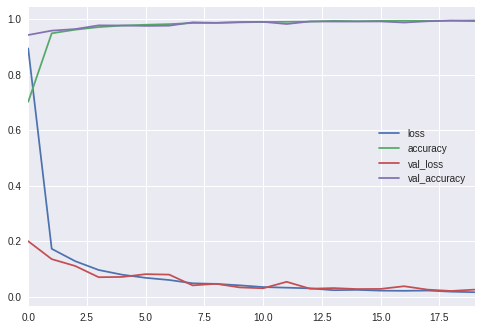

In [126]:
conv_hist_df = pd.DataFrame(conv_hist.history)
conv_hist_df.plot()

In [124]:
conv_model.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 28, 28, 128)       1280      
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 28, 28, 128)       147584    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 14, 14, 128)       147584    
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 128)         0  

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 17s 279us/sample - loss: 0.9216 - acc: 0.6929 - val_loss: 0.2028 - val_acc: 0.9459
Epoch 2/20
60000/60000 [==============================] - 16s 271us/sample - loss: 0.1746 - acc: 0.9485 - val_loss: 0.1162 - val_acc: 0.9655
Epoch 3/20
60000/60000 [==============================] - 16s 272us/sample - loss: 0.1211 - acc: 0.9636 - val_loss: 0.0932 - val_acc: 0.9700
Epoch 4/20
60000/60000 [==============================] - 16s 272us/sample - loss: 0.0979 - acc: 0.9704 - val_loss: 0.0680 - val_acc: 0.9770
Epoch 5/20
60000/60000 [==============================] - 16s 272us/sample - loss: 0.0771 - acc: 0.9766 - val_loss: 0.0688 - val_acc: 0.9778
Epoch 6/20
60000/60000 [==============================] - 16s 271us/sample - loss: 0.0637 - acc: 0.9802 - val_loss: 0.0835 - val_acc: 0.9739
Epoch 7/20
60000/60000 [==============================] - 16s 272us/sample - loss: 0.0568 - acc: 0.9824 

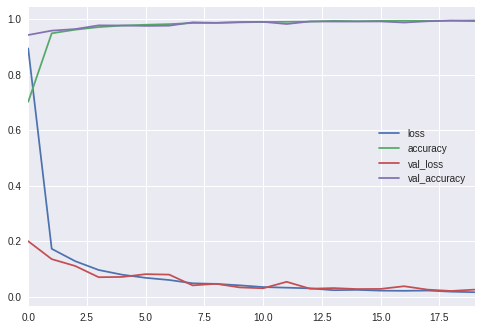

In [125]:
# 2)
hw_model = build_model()
hw_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
hw_hist = hw_model.fit(x_train, y_train, batch_size=512, epochs=20, validation_data=(x_test, y_test))
hw_hist_df = pd.DataFrame(conv_hist.history)
hw_hist_df.plot()

## Inferences

In [127]:
img = tf.keras.preprocessing.image.load_img('/content/test_digit_8.png', grayscale=True, target_size=(28,28))

/tensorflow-2.1.0/python3.6/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


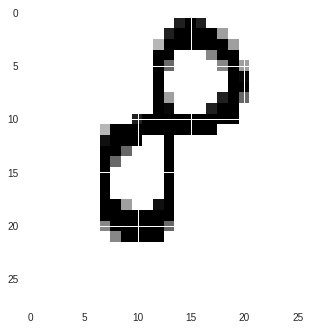

In [128]:
plt.imshow(img, cmap='gray')

In [0]:
img_array = tf.keras.preprocessing.image.img_to_array(img)

In [130]:
img_array.shape

(28, 28, 1)

In [0]:
img_array = np.expand_dims(img_array, 0)

In [0]:
img_array = (img_array - 127.5) / 127.5

In [0]:
pred = hw_model.predict(img_array)

In [134]:
np.argmax(pred)

8

In [0]:
y_pred = conv_model(img_array)

In [136]:
y_pred

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[2.2440766e-08, 3.1606985e-19, 2.5863515e-05, 6.1028916e-13,
        1.6494359e-07, 4.1802221e-12, 5.5413210e-07, 1.8925349e-14,
        9.9997342e-01, 1.9434508e-11]], dtype=float32)>

In [137]:
np.argmax(y_pred)

8

In [0]:
def inference(img_path):
  img = tf.keras.preprocessing.image.load_img(img_path, grayscale=True, target_size=(28,28))
  img_array = tf.keras.preprocessing.image.img_to_array(img)
  img_array = np.expand_dims(img_array, 0)
  img_array = (img_array - 127.5) / 127.5
  print(img_array.shape)
  pred = hw_model.predict(img_array)
  y_pred = conv_model(img_array)
  print('result')
  print('hw model', np.argmax(pred))
  print('conv model', np.argmax(y_pred))

In [139]:
inference('/content/test_digit_2.png')

(1, 28, 28, 1)
result
hw model 8
conv model 8


/tensorflow-2.1.0/python3.6/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [140]:
inference('/content/test_digit_2_2.png')

(1, 28, 28, 1)
result
hw model 8
conv model 8


/tensorflow-2.1.0/python3.6/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [141]:
x_train.shape

(60000, 28, 28, 1)

In [0]:
inf_x_data = x_test[:20]
inf_y_data = y_test[:20]

In [0]:
inf_y_data = np.argmax(inf_y_data, axis=1)

In [145]:
inf_y_data

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4])

In [147]:
inf_x_data[0].shape

(28, 28, 1)

In [150]:
hw_model.input

<tf.Tensor 'input_14:0' shape=(None, 28, 28, 1) dtype=float32>

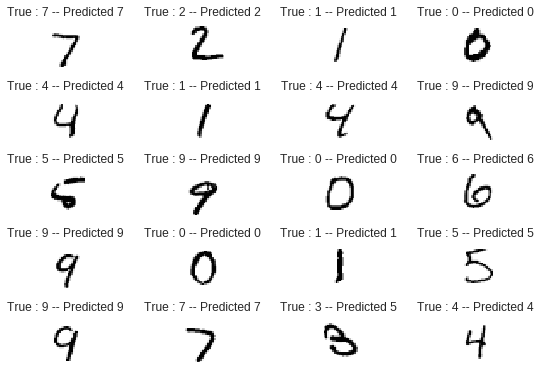

Batch -- 0


IndexError: ignored

In [164]:
start_point = 0
BATCH_SIZE = 20 

for k in range(5):
  inf_x_data = x_test[start_point : BATCH_SIZE]
  inf_y_data = y_test[start_point : BATCH_SIZE]
  inf_y_data = np.argmax(inf_y_data, axis=1)

  for i in range(20):
    x = np.expand_dims(inf_x_data[i], 0)
    y_pred = hw_model.predict(x)
    # print(f'{i} -- {y_pred}')
    plt.subplot(5,4,i+1)
    plt.imshow(inf_x_data[i].reshape(28,28))
    plt.title(f'True : {inf_y_data[i]} -- Predicted {np.argmax(y_pred)}')
    plt.tight_layout()
    plt.axis('off')
  plt.show()
  start_point = 

  print(f'Batch -- {k}')